# Stroke prediction

Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("healthcare-dataset-stroke-data.csv")
df.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
df["stroke"].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [4]:
df.shape

(5110, 12)

# Data Cleaning:

In [5]:
plt.style.use("fivethirtyeight")

<AxesSubplot:>

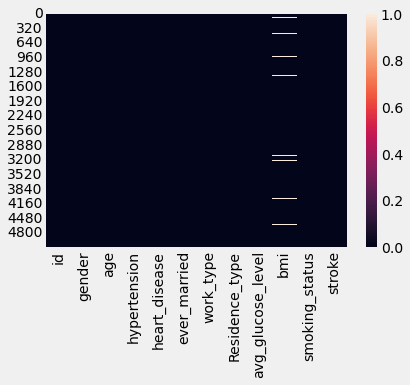

In [6]:
# Find the null values in the dataset:
sns.heatmap(df.isnull())

In [7]:
# Percentage of value is missing in the dataset:
round(df.isnull().mean()*100,2)

id                   0.00
gender               0.00
age                  0.00
hypertension         0.00
heart_disease        0.00
ever_married         0.00
work_type            0.00
Residence_type       0.00
avg_glucose_level    0.00
bmi                  3.93
smoking_status       0.00
stroke               0.00
dtype: float64

In [8]:
# Remove the id,work type columns:
df.drop(columns=["id","work_type"],inplace=True)

In [9]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Rural,174.12,24.0,never smoked,1


In [10]:
# Fill the missing value in the bmi columns by the mean:
df.fillna(df["bmi"].mean(),inplace=True)

In [11]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

# Perform EDA

<AxesSubplot:>

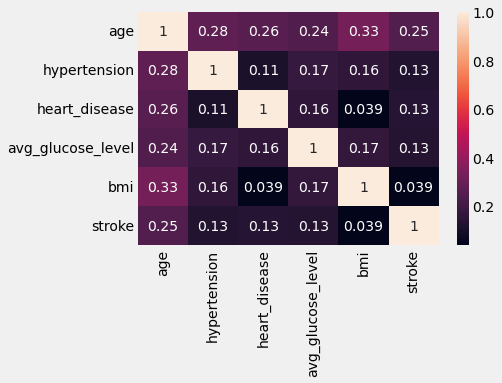

In [12]:
# Make the Correlation matrix:
cor=df.corr()
sns.heatmap(cor,annot=True)

The most affecting features of predicting the strokes is age,hypertension,heart_disease,avg_glucose_level.

In [13]:
df.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

# Finding Outliers in the numerical columns and perform capping:

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

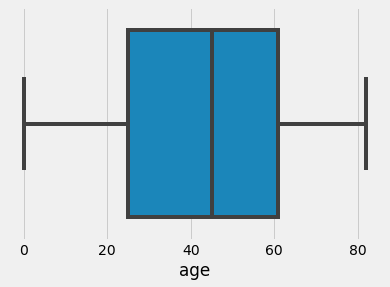

In [14]:
sns.boxplot(df["age"])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='avg_glucose_level'>

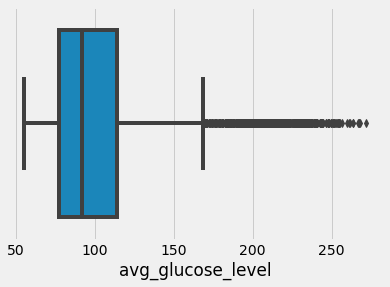

In [15]:
sns.boxplot(df["avg_glucose_level"])

In [16]:
upper_limit=170

Perform capping on the avg_glucose_level and bmi to remove the outliers.

In [17]:
df["avg_glucose_level"]=np.where(
df["avg_glucose_level"]>upper_limit,
    upper_limit,
    df["avg_glucose_level"])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='avg_glucose_level'>

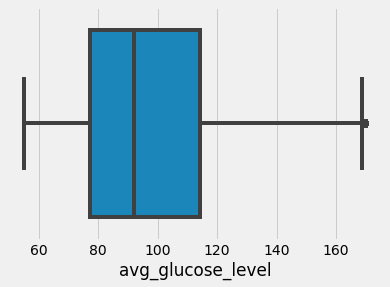

In [18]:
sns.boxplot(df["avg_glucose_level"])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bmi'>

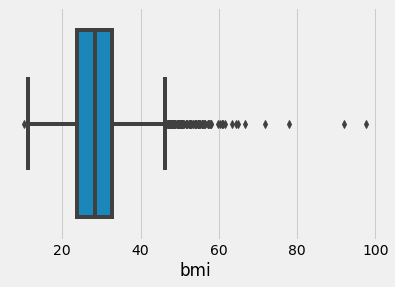

In [19]:
sns.boxplot(df["bmi"])

In [20]:
upper_limit=46
df["bmi"]=np.where(
df["bmi"]>upper_limit,
    upper_limit,
    df["bmi"])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bmi'>

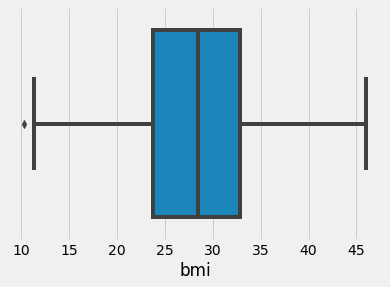

In [21]:
sns.boxplot(df["bmi"])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

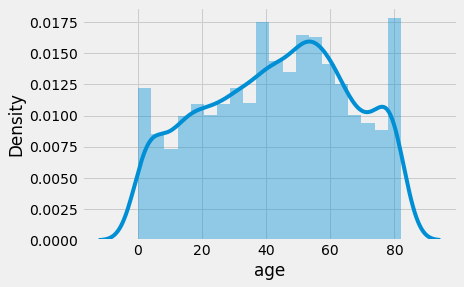

In [22]:
# On the basis of age columns:
sns.distplot(df["age"])

The person which have medium or high age is more chance of stroke.

In [23]:
df[df["gender"]=="Other"]

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3116,Other,26.0,0,0,No,Rural,143.33,22.4,formerly smoked,0


In [24]:
df.drop([df.index[3116]],inplace=True)

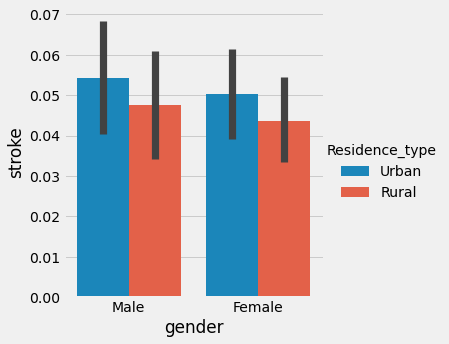

In [25]:
sns.catplot(x="gender",y="stroke",hue="Residence_type",kind="bar",data=df)

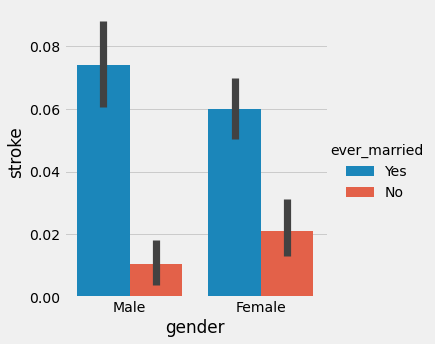

In [26]:
sns.catplot(x="gender",y="stroke",hue="ever_married",kind="bar",data=df)

In [27]:
# Different categories in the smoking_status.
df["smoking_status"].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

<Figure size 720x720 with 0 Axes>

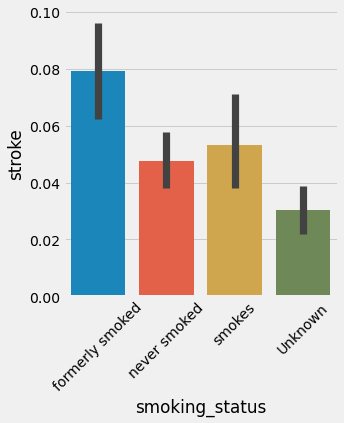

In [28]:
plt.figure(figsize=(10,10))
sns.catplot(x="smoking_status",y="stroke",kind="bar",data=df)
plt.xticks(rotation=45)
plt.show()

# Drop the gender,Residence_type,ever_married columns:

In [29]:
df.drop(columns=["gender","Residence_type","ever_married"],inplace=True)

In [30]:
df.head(2)

,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
0,67.0,0,1,170.0,36.600000,formerly smoked,1
1,61.0,0,0,170.0,28.893237,never smoked,1


# Split a dataset for the Training and Testing:

In [31]:
# Split a dataset into a train and test:
from sklearn.model_selection import train_test_split

In [32]:
x=df.iloc[:,:6]
y=df[["stroke"]]

In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [34]:
x_train

,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status
122,80.0,0,0,170.00,31.7,smokes
4095,57.0,0,0,106.84,29.6,never smoked
3724,61.0,0,0,152.84,28.6,Unknown
1625,34.0,0,0,149.62,39.4,formerly smoked
720,81.0,0,0,90.90,31.2,formerly smoked
...,...,...,...,...,...,...
140,82.0,0,1,103.68,25.0,never smoked
1847,42.0,0,0,79.99,26.3,never smoked
4308,67.0,0,0,101.46,25.9,formerly smoked
2177,5.0,0,0,92.56,18.0,Unknown


# Perform the Ordinal Encoding on the smoking_status columns:

In [35]:
# Perform ordinal encoding on the smoking_status columns:
from sklearn.preprocessing import OrdinalEncoder

In [36]:
oe=OrdinalEncoder(categories=[["never smoked","formerly smoked","smokes","Unknown"]])

In [37]:
x_train["smoking_status"]=oe.fit_transform(x_train.loc[:,["smoking_status"]])

In [38]:
x_test["smoking_status"]=oe.transform(x_test.loc[:,["smoking_status"]])

In [39]:
x_train.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status
122,80.0,0,0,170.00,31.7,2.0
4095,57.0,0,0,106.84,29.6,0.0
3724,61.0,0,0,152.84,28.6,3.0
1625,34.0,0,0,149.62,39.4,1.0
720,81.0,0,0,90.90,31.2,1.0


# Apply Decision Tree Algorithms:

In [40]:
from sklearn.tree import DecisionTreeClassifier

In [41]:
model=DecisionTreeClassifier()

In [42]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [43]:
y_pred=model.predict(x_test)

In [44]:
# Accuracy of the model:
model.score(x_test,y_test)

0.9158512720156555

In [45]:
y_train["stroke"].value_counts()

0    3405
1     171
Name: stroke, dtype: int64

In [46]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[1388,   67],
       [  62,   16]], dtype=int64)

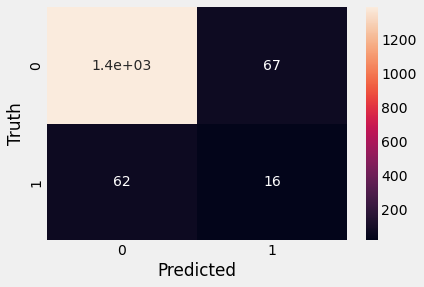

In [47]:
sns.heatmap(cm,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

# Apply Naive Bayes:

In [48]:
from sklearn.naive_bayes import GaussianNB

In [49]:
model1=GaussianNB()

In [50]:
model1.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [51]:
model1.score(x_test,y_test)

0.8754076973255055

In [52]:
y_pred1=model1.predict(x_test)

In [53]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred1)
cm

array([[1313,  142],
       [  49,   29]], dtype=int64)

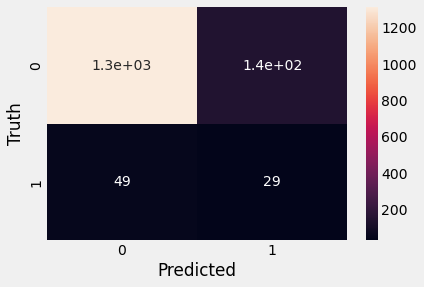

In [54]:
sns.heatmap(cm,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()